In [53]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

In [54]:
nash_data = pd.read_csv(
    Path("nash_laborforce.csv"), index_col="Month", infer_datetime_format=True, parse_dates=True
)
nash_data.head()

,Series ID,Year,Period,Label,Value,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
Month,,,,,,,,,,,,,
2010-01-01,LAUMT473498000000006,2010,M01,2010 Jan,855369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-01,LAUMT473498000000006,2010,M02,2010 Feb,857834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-01,LAUMT473498000000006,2010,M03,2010 Mar,863974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-01,LAUMT473498000000006,2010,M04,2010 Apr,876458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-01,LAUMT473498000000006,2010,M05,2010 May,880555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
nash_labor = nash_data[['Value']]

nash_labor.head()

,Value
Month,
2010-01-01,855369
2010-02-01,857834
2010-03-01,863974
2010-04-01,876458
2010-05-01,880555


In [56]:
nash_case_shiller = pd.read_csv(
    Path("nash_case_shiller.csv"), index_col="DATE", infer_datetime_format=True, parse_dates=True
)
nash_case_shiller.head()

,CSUSHPISA
DATE,
2010-01-01,147.394
2010-02-01,145.631
2010-03-01,145.859
2010-04-01,146.399
2010-05-01,146.389


In [57]:
nash_df = pd.merge(nash_labor,nash_case_shiller, left_index = True, right_index = True)

nash_df.columns = ['nash_labor_force','nash_case_shiller']

In [58]:
nash_df.head()

,nash_labor_force,nash_case_shiller
2010-01-01,855369,147.394
2010-02-01,857834,145.631
2010-03-01,863974,145.859
2010-04-01,876458,146.399
2010-05-01,880555,146.389


In [59]:
nash_df['nash_labor_force_pct'] = nash_df['nash_labor_force'].pct_change()

In [60]:
nash_df['nash_case_shiller_pct'] = nash_df['nash_case_shiller'].pct_change()

In [61]:
nash_df.head()
#df['pandas_SMA_3'] = df.iloc[:,1].rolling(window=3).mean()

,nash_labor_force,nash_case_shiller,nash_labor_force_pct,nash_case_shiller_pct
2010-01-01,855369,147.394,NaN,NaN
2010-02-01,857834,145.631,0.002882,-0.011961
2010-03-01,863974,145.859,0.007158,0.001566
2010-04-01,876458,146.399,0.014450,0.003702
2010-05-01,880555,146.389,0.004674,-0.000068


In [86]:
nash_df["case_shifted"] = nash_df["nash_case_shiller_pct"].shift(-12)

In [91]:
# another idea is to predict the price level in a year based on the features in a given month, 
# could make this rolling features if we want

nash_df["case_shifted_actual"] = nash_df["nash_case_shiller"].shift(-12)

In [92]:
nash_df.head(30)

,nash_labor_force,nash_case_shiller,nash_labor_force_pct,nash_case_shiller_pct,case_shifted,case_shifted_actual
2010-01-01,855369,147.394,NaN,NaN,-0.003766,141.522
2010-02-01,857834,145.631,0.002882,-0.011961,-0.008274,140.351
2010-03-01,863974,145.859,0.007158,0.001566,-0.002622,139.983
2010-04-01,876458,146.399,0.014450,0.003702,0.000171,140.007
2010-05-01,880555,146.389,0.004674,-0.000068,-0.000757,139.901
2010-06-01,887901,145.716,0.008342,-0.004597,-0.000315,139.857
2010-07-01,888009,144.985,0.000122,-0.005017,-0.000930,139.727
2010-08-01,884095,143.908,-0.004408,-0.007428,-0.003020,139.305
2010-09-01,885992,143.011,0.002146,-0.006233,-0.004601,138.664
2010-10-01,888929,142.522,0.003315,-0.003419,-0.005149,137.950


In [93]:
nash_df.dropna(inplace = True)

In [94]:
# https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
# XGBoost

In [95]:
X = nash_df[["nash_labor_force_pct"]]

y = nash_df[['case_shifted_actual']]

In [96]:
# # Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [97]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [98]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[0.52328784]]

 [[0.64407458]]

 [[0.85006592]]

 [[0.57393009]]

 [[0.67754712]]] 

X_test sample values:
[[[0.70142801]]

 [[0.56632137]]

 [[0.51907041]]

 [[0.46858417]]

 [[0.91802007]]]


In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [100]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [101]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [102]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 5)              140       
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 5)              0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 5)              220       
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 5)              0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_5 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [103]:
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
84/84 [==============================] - 15s 5ms/step - loss: 0.0170
Epoch 2/10
84/84 [==============================] - 0s 5ms/step - loss: 0.0247
Epoch 3/10
84/84 [==============================] - 0s 5ms/step - loss: 0.0368
Epoch 4/10
84/84 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 5/10
84/84 [==============================] - 0s 5ms/step - loss: 0.0455
Epoch 6/10
84/84 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 7/10
84/84 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 8/10
84/84 [==============================] - 0s 5ms/step - loss: 0.0452
Epoch 9/10
84/84 [==============================] - 0s 5ms/step - loss: 0.0492
Epoch 10/10
84/84 [==============================] - 0s 5ms/step - loss: 0.0421


In [104]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 4s 0s/step - loss: 0.2100


0.20996016263961792

In [105]:
# Make some predictions
predicted = model.predict(X_test)

In [106]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [109]:
# Create a DataFrame of Real and Predicted values
compare = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = nash_df.index[-len(real_prices): ])
compare.head()

,Real,Predicted
2017-02-01,199.125,166.735840
2017-03-01,200.087,166.653061
2017-04-01,200.925,166.623077
2017-05-01,201.750,166.590469
2017-06-01,202.559,166.859329
2017-07-01,203.135,166.678177
2017-08-01,203.875,166.372574
2017-09-01,204.396,166.698288
2017-10-01,204.995,166.584396
2017-11-01,205.441,166.621002


<AxesSubplot:>

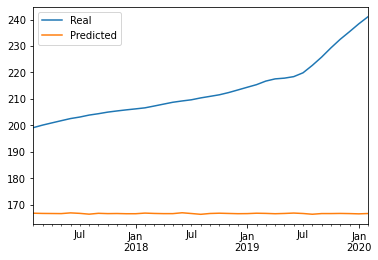

In [108]:
# Plot the real vs predicted prices as a line chart
compare.plot()